# Dimensionaalsuse vähendamine

Põhineb kursuse põhiõpiku (S. Raschka, Python Machine Learning) [peatükil 5.](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch05/ch05.ipynb)


Vt ka [scikit-learn Decompositions dokumentatsiooni](https://scikit-learn.org/stable/modules/decomposition.html#decompositions).

## Sisukord

* [Ülesanne 6.1](#6_1)
* [Peakomponentide analüüs](#PCA_det)
* [Ülesanne 6.2](#6_2)


Dimensionaalsuse vähendamine/leidmine (*feature extraction*) tähendab uute kunstlike atribuutide defineerimist olemasolevate atribuutide kombinatsioonina. Eesmärgiks on atribuutide arvu vähendamine asendades iga tugevas positiivses/negatiivses korrelatsioonis olevate atribuutide grupi ühe uue atribuudiga.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

w_data = load_wine()
print(w_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

PCA (*Principal Component Analysis*, peakomponentanalüüs)  leiab  uued atribuudid (dimensioonid) ehk komponendid olemasoleva $d$ atribuuti (dimensioonide) lineaarse kombinatsioonina.  $j$-ndale peakomponendile vastab kaaluvektor $\textbf{w}^{(j)} = (w_1, \ldots, w_d)^{(j)}$. 

Rea $i$ peakomponendi $j$ väärtuseks on kaaluvektori $\textbf{w}^{(j)}$  skalaarkorrutis reavektoriga $\textbf{x}^{(i)}$:
$$t_{ij} = \textbf{x}^{(i)} \cdot \textbf{w}^{(j)} = 
x_1^{(i)} \cdot w_1^{(j)} + \ldots + x_d^{(i)} \cdot w_d^{(j)} $$

Esitades algse andmestiku $n \times d$ maatriksina $X$ ja peakomponentide kaaluvektorid $d \times k$ maatriksina $W$ leiame nende maatrikskorrutisena uue teisendatud $n \times k$ maatriksi  $T$, kus $n$ on ridade arv ja $k$ on peakomponentide arv:

$$T=XW$$

In [2]:
X = StandardScaler().fit_transform(w_data.data) # proovi ilma, väga erinev
#X = w_data.data
pca = PCA(n_components=5)
#pca.fit(w_data.data)
pca.fit(X)

print("Peakomponentide maatriks")
print("(k, d):", pca.components_.shape)
print("W:\n", pca.components_.round(1))


Peakomponentide maatriks
(k, d): (5, 13)
W:
 [[ 0.1 -0.2 -0.  -0.2  0.1  0.4  0.4 -0.3  0.3 -0.1  0.3  0.4  0.3]
 [-0.5 -0.2 -0.3  0.  -0.3 -0.1  0.  -0.  -0.  -0.5  0.3  0.2 -0.4]
 [-0.2  0.1  0.6  0.6  0.1  0.1  0.2  0.2  0.1 -0.1  0.1  0.2 -0.1]
 [-0.   0.5 -0.2  0.1 -0.4  0.2  0.2 -0.2  0.4  0.1 -0.4  0.2 -0.2]
 [-0.3  0.  -0.1  0.1  0.7 -0.1 -0.1 -0.5  0.1 -0.1 -0.2 -0.1 -0.2]]


In [3]:
comp_frame = pd.DataFrame(pca.components_, columns=w_data.feature_names)
comp_frame.T

,0,1,2,3,4
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437


Peakomponendid on järjestatud seletatud variatsiooni alusel. Seega me teame, millised peakomponendid me peame esmajärjekorras kasutusele võtma, aga kas me soovime rohkem variatsiooni seletada suurema arvu peakomponentidega või vähem variatsiooni seletada väiksema arvu peakomponentidega on valiku koht.

In [4]:
print("Peakomponentide seletatud variatsioon")
print(pca.explained_variance_) 
print(pca.explained_variance_ratio_.round(3), sum(pca.explained_variance_ratio_))  

Peakomponentide seletatud variatsioon
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868]
[0.362 0.192 0.111 0.071 0.066] 0.8016229275554788


In [5]:
X_t = pca.transform(X)
print("(n, k):", X_t.shape)
print("(X_t (valemis T):\n", X_t.round(2))

(n, k): (178, 5)
(X_t (valemis T):
 [[ 3.32 -1.44 -0.17 -0.22  0.69]
 [ 2.21  0.33 -2.03 -0.29 -0.26]
 [ 2.52 -1.03  0.98  0.72 -0.25]
 [ 3.76 -2.76 -0.18  0.57 -0.31]
 [ 1.01 -0.87  2.03 -0.41  0.3 ]
 [ 3.05 -2.12 -0.63 -0.52 -0.63]
 [ 2.45 -1.17 -0.98 -0.07 -1.03]
 [ 2.06 -1.61  0.15 -1.19  0.08]
 [ 2.51 -0.92 -1.77  0.06 -0.89]
 [ 2.75 -0.79 -0.98  0.35 -0.47]
 [ 3.48 -1.3  -0.42  0.03 -0.34]
 [ 1.75 -0.61 -1.19 -0.89 -0.74]
 [ 2.11 -0.68 -0.87 -0.36 -1.21]
 [ 3.46 -1.13 -1.2   0.16 -2.02]
 [ 4.31 -2.1  -1.26  0.31 -1.03]
 [ 2.31 -1.66  0.22 -1.44 -0.47]
 [ 2.17 -2.33  0.83 -0.91 -0.  ]
 [ 1.9  -1.63  0.79 -1.08 -0.44]
 [ 3.54 -2.52 -0.49 -0.91 -1.15]
 [ 2.08 -1.06 -0.16  0.48  0.88]
 [ 3.12 -0.79 -0.36 -0.03  0.97]
 [ 1.09 -0.24  0.94  1.03  0.32]
 [ 2.54  0.09 -0.31 -0.05 -0.43]
 [ 1.64  0.52  0.14 -0.41 -0.38]
 [ 1.76  0.32  0.89 -0.12 -0.56]
 [ 0.99 -0.94  3.82 -1.32  0.16]
 [ 1.78 -0.69 -0.09 -0.23 -1.14]
 [ 1.24  0.09 -1.39 -0.5  -0.38]
 [ 2.19 -0.69  1.39 -0.78 -0.81]
 [ 2.26

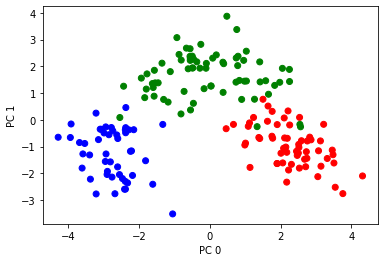

In [6]:
# Kuva objektid kahte oluliseimat komponenti pidi

import matplotlib.pyplot as plt
%matplotlib inline

colormap = {0: "red", 1: "green", 2: "blue"}

plt.scatter(X_t[:, 0], X_t[:, 1], c=[colormap[y] for y in w_data.target])
#plt.scatter(X[:, 5], X[:, 6], c=[colormap[y] for y in w_data.target]) # esimesed 2 attr
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.show()

<a id='6_1'></a>
## Ülesanne 6.1

Koostada normaliseeritud loomaaia andmestikule (fail `standardiseeritud_zoo.csv` Moodlest)  peakomponentanalüüs:
* Tõsta andmestikust välja (DataFrame `pop()` meetodi abil) veerg `type` ja omistada see mingile muutujale hilisemaks graafiku joonistamiseks.
* Leida sklearn [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  klassi abil mitut komponenti on vaja, et seletada vähemalt 80% andmestiku varieeruvusest (PCA atribuut `explained_variance_ratio_`)
* Leida need komponendid ja kuvada atribuutide kaalud komponentides
* Transformeerida andmestik nõnda, et atribuutideks on komponendid, mis seletavad vähemalt 80% andmestiku varieeruvusest
* Joonistada graafik (`plt.scatter()`), kus on kujutatud loomad kahe suurima kaaluga (omaväärtusega) peakomponenti pidi ja värviga nende tüübid (0-7).
* Anda kahele suurima kaaluga peakomponendile sisuline interpretatsioon, vaadeldes suure absoluutväärtusega kaale komponentides (stiilis 'komponent 0 näitab veeloomaks olemist'). Millised loomad omavad vastava peakomponendi kõrget väärtust (`zoo_df[X_t[:, 0] > 0].index` vms)? Millised tüübid eristuvad graafikul selgelt? Panna vastused kirja Markdown lahtrisse. 

In [17]:
import pandas as pd
from sklearn.decomposition import PCA

zoo_df = pd.read_csv("./standardiseeritud_zoo.csv", header=0, index_col=0)
y = zoo_df.pop("type")
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,101.000000
mean,8.574000e-17,-3.957231e-17,1.033277e-16,-9.893076e-17,3.517538e-17,7.914461e-17,-2.286400e-16,1.978615e-16,8.793846e-17,-6.815230e-17,2.143500e-16,5.496154e-18,6.760269e-17,-1.000300e-16,-4.946538e-17,5.496154e-17,2.831683
std,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,2.102709
min,-8.610339e-01,-4.969040e-01,-1.185227e+00,-8.266398e-01,-5.582905e-01,-7.442084e-01,-1.115547e+00,-1.234909e+00,-2.147350e+00,-1.951800e+00,-2.932942e-01,-4.498677e-01,-1.404435e+00,-1.698416e+00,-3.843531e-01,-8.785954e-01,1.000000
25%,-8.610339e-01,-4.969040e-01,-1.185227e+00,-8.266398e-01,-5.582905e-01,-7.442084e-01,-1.115547e+00,-1.234909e+00,4.656903e-01,5.123475e-01,-2.932942e-01,-4.498677e-01,-4.159477e-01,-1.698416e+00,-3.843531e-01,-8.785954e-01,1.000000
50%,-8.610339e-01,-4.969040e-01,8.437206e-01,-8.266398e-01,-5.582905e-01,-7.442084e-01,8.964215e-01,8.097763e-01,4.656903e-01,5.123475e-01,-2.932942e-01,-4.498677e-01,5.725397e-01,5.887841e-01,-3.843531e-01,-8.785954e-01,2.000000
75%,1.161395e+00,-4.969040e-01,8.437206e-01,1.209717e+00,-5.582905e-01,1.343710e+00,8.964215e-01,8.097763e-01,4.656903e-01,5.123475e-01,-2.932942e-01,-4.498677e-01,5.725397e-01,5.887841e-01,-3.843531e-01,1.138180e+00,4.000000
max,1.161395e+00,2.012461e+00,8.437206e-01,1.209717e+00,1.791182e+00,1.343710e+00,8.964215e-01,8.097763e-01,4.656903e-01,5.123475e-01,3.409545e+00,2.222876e+00,2.549514e+00,5.887841e-01,2.601775e+00,1.138180e+00,7.000000


In [87]:
pca = PCA()
pca.fit(zoo_df)

total = 0
for i, comp in enumerate(pca.explained_variance_ratio_): 
    total += comp
    print(f"{i+1:>2} components = {round(total, 3):<5} of variance")
    if total - comp < 0.8 and total > 0.8:
        print("=" * 34)

 1 components = 0.292 of variance
 2 components = 0.501 of variance
 3 components = 0.649 of variance
 4 components = 0.725 of variance
 5 components = 0.785 of variance
 6 components = 0.832 of variance
 7 components = 0.867 of variance
 8 components = 0.899 of variance
 9 components = 0.927 of variance
10 components = 0.951 of variance
11 components = 0.968 of variance
12 components = 0.981 of variance
13 components = 0.989 of variance
14 components = 0.997 of variance
15 components = 0.999 of variance
16 components = 1.0   of variance


In [88]:
components_df = pd.DataFrame(pca.components_[:6], columns=zoo_df.columns)
components_df.T

,0,1,2,3,4,5
hair,-0.407817,-0.113788,0.100052,0.055304,0.009810,-0.061612
feathers,0.201568,-0.192502,-0.483015,-0.178094,0.036435,0.196253
eggs,0.431587,-0.005131,-0.041780,0.014262,-0.091265,0.053563
milk,-0.444796,0.001635,0.012673,-0.030478,-0.056348,-0.016135
airborne,0.195420,-0.311645,-0.278304,0.041590,0.074018,-0.099996
aquatic,0.204870,0.373556,0.063088,-0.069441,-0.060612,0.192144
predator,0.029016,0.252801,0.117730,-0.578215,0.226857,0.345999
toothed,-0.322981,0.320715,0.023563,0.165525,0.094193,-0.199457
backbone,-0.205444,0.204606,-0.476420,-0.016102,0.132586,-0.014695
breathes,-0.210415,-0.366020,-0.189711,-0.166973,0.113468,-0.099012


In [90]:
X_t = PCA(n_components=6).fit_transform(zoo_df)
print(X_t.shape)
pd.DataFrame(X_t, columns=[f"PC_{i}" for i in range(6)])

(101, 6)


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
0,-2.535256,-0.260278,1.241842,-1.065734,-0.296433,0.261767
1,-2.877354,-0.401547,-0.100018,-0.014988,-0.308969,-0.627116
2,1.761003,3.705592,-0.180105,0.578327,-0.327066,-0.379035
3,-2.535256,-0.260278,1.241842,-1.065734,-0.296433,0.261767
4,-2.818975,0.107081,0.136852,-1.178338,0.147460,0.069023
...,...,...,...,...,...,...
96,-2.764120,-0.065219,-0.409317,0.151818,-0.235706,-0.786741
97,1.667523,-3.219581,2.723445,0.743239,2.290063,-0.896837
98,-2.818975,0.107081,0.136852,-1.178338,0.147460,0.069023
99,2.018815,-1.257793,1.409204,0.715264,-1.014103,-0.963336


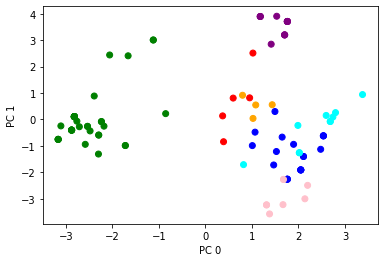

In [44]:
colormap = {0: "yellow", 1: "green", 2: "blue", 3: "red", 4: "purple", 5: "orange", 6: "pink", 7: "cyan"}

plt.scatter(X_t[:, 0], X_t[:, 1], c=[colormap[y] for y in y])
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.show()

**PC_0** näitab peamiselt kas loom ei ole imetaja või ta on muneja (Oluline roll ka karvade olemasolul, mis korrelleerub tugevalt imetamisega).  
**PC_1** näitab veeloomaks olemist selle järgi, kas loomal on uimed, kas ta hingab, elab vees või omab jalgu.  
  
Selgelt eristuvad:  
1) Roheline - type 1  
2) Lilla - type 4  
3) Roosa - type 6  

In [93]:
print(zoo_df[X_t[:, 0] < 0.5].index)  # PC_0
print(zoo_df[X_t[:, 1] > 3.5].index)  # PC_1

Index(['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy',
       'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl',
       'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink',
       'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony',
       'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal',
       'sealion', 'squirrel', 'tortoise', 'tuatara', 'vampire', 'vole',
       'wallaby', 'wolf'],
      dtype='object', name='animal_name')
Index(['bass', 'catfish', 'chub', 'dogfish', 'herring', 'pike', 'piranha',
       'stingray', 'tuna'],
      dtype='object', name='animal_name')


<a id='PCA_det'></a>
## Peakomponentide analüüs

Peakomponendid on atribuutide kovariatsioonimaatriksi omavektorid. Vastavad atribuutide kovariatsioonimaatriksi omaväärtused määravad nende peakomponentide olulisuse ehk seletatud variatsiooni.  Järgnevalt vaatleme nende leidmist lähemalt.

Sammud:

* Standardiseeri $d$-dimensionaalne (atribuudiga) andmestik $X$
* Konstrueeri $d \times d$ atribuutide kovariatsioonimaatriks $\Sigma$
* Leia $\Sigma$ omavektorid ja omaväärtused
* Vali $k$ suurimale omaväärtusele vastavat omavektorit ja konstrueeri nendest projektisoonimaatriks $W$
* Teisenda $X$ kasutades projektsioonimaatriksit $W$

Kovariatsioon $\sigma_{jk}$ atribuutide $j, k$ vahel, summeerides üle $i = 1...n$ rea ($\mu$ on keskväärtus):
    
$$ \sigma_{jk} = \frac{1}{n} \sum_{i=1}^n (x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k)$$

*(Korrelatsioon on kovariatsioon jagatud mõlema atribuudi standardhälvetega.)*

Tulemuseks on kovariatsioonimaatriks $\Sigma$ (*Sigma*):
    $$ \Sigma = \begin{bmatrix}
    \sigma_{11} & \sigma_{12} &  \dots  & \sigma_{1d} \\
    \sigma_{21} & \sigma_{22} &  \dots  & \sigma_{2d} \\
    \vdots & \vdots &  \ddots & \vdots \\
    \sigma_{d1} & \sigma_{d2}  & \dots  & \sigma_{dd}
\end{bmatrix} $$

In [7]:
# Loo kovariatsioonimaatriks

kov = np.cov(X.T)
print(kov.shape)
display(pd.DataFrame(kov, columns=w_data.feature_names, index=w_data.feature_names))



(13, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.005650,0.094930,0.212740,-0.311988,0.272328,0.290734,0.238153,-0.156810,0.137470,0.549451,-0.072153,0.072752,0.647357
malic_acid,0.094930,1.005650,0.164972,0.290130,-0.054883,-0.337061,-0.413329,0.294632,-0.221993,0.250392,-0.564467,-0.370794,-0.193095
ash,0.212740,0.164972,1.005650,0.445872,0.288206,0.129708,0.115727,0.187283,0.009706,0.260350,-0.075089,0.003933,0.224890
alcalinity_of_ash,-0.311988,0.290130,0.445872,1.005650,-0.083804,-0.322928,-0.353355,0.363966,-0.198442,0.018838,-0.275503,-0.278332,-0.443086
magnesium,0.272328,-0.054883,0.288206,-0.083804,1.005650,0.215613,0.196890,-0.257742,0.237776,0.201080,0.055711,0.066377,0.395573
total_phenols,0.290734,-0.337061,0.129708,-0.322928,0.215613,1.005650,0.869448,-0.452477,0.615873,-0.055448,0.436132,0.703904,0.500929
flavanoids,0.238153,-0.413329,0.115727,-0.353355,0.196890,0.869448,1.005650,-0.540939,0.656379,-0.173353,0.546549,0.791641,0.496985
nonflavanoid_phenols,-0.156810,0.294632,0.187283,0.363966,-0.257742,-0.452477,-0.540939,1.005650,-0.367912,0.139843,-0.264123,-0.506113,-0.313144
proanthocyanins,0.137470,-0.221993,0.009706,-0.198442,0.237776,0.615873,0.656379,-0.367912,1.005650,-0.025393,0.297214,0.522000,0.332283
color_intensity,0.549451,0.250392,0.260350,0.018838,0.201080,-0.055448,-0.173353,0.139843,-0.025393,1.005650,-0.524761,-0.431238,0.317886


Omaväärtus $\lambda$ ja omavektor $\mathbf{v}$ on lahendid järgmisele võrrandile:

$$ \Sigma \mathbf{v} = \lambda \mathbf{v} $$

see tähendab pikemalt:


$$\begin{bmatrix}
\sigma_{11} v_1 + \sigma_{12} v_2 +  \dots  + \sigma_{1d} v_d \\
\sigma_{21} v_1 + \sigma_{22} v_2 +  \dots  + \sigma_{2d} v_d \\
\vdots  \\
\sigma_{d1} v_1 + \sigma_{d2} v_2 + \dots  + \sigma_{dd} v_d
\end{bmatrix} = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \\ \vdots \\ \lambda v_d\end{bmatrix} $$



Omavektorite ja omaväärtuste osas võib lisaks vaadata ka P. Puusempa Lineaaralgebra õpikut või [3Blue1Brown omavektorite YT videot](https://youtu.be/PFDu9oVAE-g).

Nimetame vektori $\mathbf{v}$ ümber vektoriks $\mathbf{w}$, et järgida meie tavalist kaaluvektorite tähistust: 

$$ \Sigma \mathbf{w} = \lambda \mathbf{w} $$.

Iga PCA kaaluvektor $\textbf{w}^{(j)}$ ongi maatriksi $X$ kovariatsioonimaatriksi omavektor, seega vastavalt omavektori definitsioonile peab selle vektori atribuudile $k$ vastav komponent rahuldama võrrandit:

$$ w_k^{(j)} = \frac{1}{\lambda} (\sigma_{k1} w_1^{(j)} + \sigma_{k2} w_2^{(j)} +  \dots + \sigma_{kk} w_k^{(j)} + \dots + \sigma_{kd} w_d^{(j)} ) $$

Atribuudi $k$ kaal $w_k$ on konstandiga $\lambda$ korrigeeritud summa teiste atribuutide kaalude korrutisest atribuudi $k$ ja teise atribuudi kovariatsiooniga. Rekursiivne definitsioon: kaal on defineeritud teiste kaalude summa abil, mis omab palju lahendeid (peakomponente).

Seega mõjutavad $w_k^{(j)}$ väärtust eriti need atribuudid $g$, mis on atribuudiga $k$ tugevas positiivses või negatiivses kovariatsioonis $\sigma_{kg}$  ja millele  vastav kaalukomponent on $w_g^{(j)}$ suure absoluutväärtusega. Kui sellised korrutised $\sigma_{kg} w_g^{(j)}$ on kooskõlaliste märkidega, siis  on kaal $w_k^{(j)}$ kõrge. Siit tuleneb interpretatsioon, et kovariatsioonimaatriksi omavektorid ehk peakomponendid vastavad omavahelist tugevat positiivset või negatiivset korrelatsiooni/kovariatsiooni omavatele algsete atribuutide gruppidele. Lisaks näeme, et mida suurem on omaväärtus $\lambda$, seda suurem peab olema sulgudes summa (seletatud variatsioon), mida $\frac{1}{\lambda}$ korrigeerib.

Arvutame kovariatsioonimaatriksile omaväärtused ja omavektorid ja teisendame andmed viie peakomponendiga.

In [8]:
oma_vrt, oma_vkt = np.linalg.eig(kov)
print(oma_vrt)
#NB! omavektorid on veerud!
display(pd.DataFrame(oma_vkt, index=w_data.feature_names))

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


,0,1,2,3,4,5,6,7,8,9,10,11,12
alcohol,-0.144329,0.483652,0.207383,-0.017856,-0.265664,0.213539,0.056396,-0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
malic_acid,0.245188,0.224931,-0.089013,0.536890,0.035214,0.536814,-0.420524,-0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
ash,0.002051,0.316069,-0.626224,-0.214176,-0.143025,0.154475,0.149171,0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
alcalinity_of_ash,0.239320,-0.010591,-0.612080,0.060859,0.066103,-0.100825,0.286969,-0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
magnesium,-0.141992,0.299634,-0.130757,-0.351797,0.727049,0.038144,-0.322883,-0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
total_phenols,-0.394661,0.065040,-0.146179,0.198068,-0.149318,-0.084122,0.027925,0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
flavanoids,-0.422934,-0.003360,-0.150682,0.152295,-0.109026,-0.018920,0.060685,-0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
nonflavanoid_phenols,0.298533,0.028779,-0.170368,-0.203301,-0.500703,-0.258594,-0.595447,-0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
proanthocyanins,-0.313429,0.039302,-0.149454,0.399057,0.136860,-0.533795,-0.372139,0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
color_intensity,0.088617,0.529996,0.137306,0.065926,-0.076437,-0.418644,0.227712,0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


In [9]:
W = oma_vkt[:, :5] # Vali 5 veergu
X_s = X @ W # Teisenda maatriks X (13 atribuuti) viie peakomponendi (uue atribuudi) kujule
print(X_s.shape)

(178, 5)


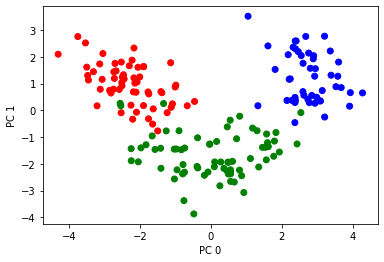

In [10]:
plt.scatter(X_s[:, 0], X_s[:, 1], c=[colormap[y] for y in w_data.target])
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.show()

Kontrollime omadust $\Sigma \mathbf{v} = \lambda \mathbf{v}$ jagades vektori $\Sigma \mathbf{v}$ elementhaaval vektoriga $\mathbf{v}$ ja saades tulemusteks $\lambda$-täidetud vektorid.

In [11]:
for i in range(5):
    print("Peakomponent", i)
    print("Meie arvutatud\n", kov @ W[:, i] / W[:, i])
    print("Sklearn\n", kov @ pca.components_[i].T / pca.components_[i].T)

Peakomponent 0
Meie arvutatud
 [4.73243698 4.73243698 4.73243698 4.73243698 4.73243698 4.73243698
 4.73243698 4.73243698 4.73243698 4.73243698 4.73243698 4.73243698
 4.73243698]
Sklearn
 [4.73243698 4.73243698 4.73243698 4.73243698 4.73243698 4.73243698
 4.73243698 4.73243698 4.73243698 4.73243698 4.73243698 4.73243698
 4.73243698]
Peakomponent 1
Meie arvutatud
 [2.51108093 2.51108093 2.51108093 2.51108093 2.51108093 2.51108093
 2.51108093 2.51108093 2.51108093 2.51108093 2.51108093 2.51108093
 2.51108093]
Sklearn
 [2.51108093 2.51108093 2.51108093 2.51108093 2.51108093 2.51108093
 2.51108093 2.51108093 2.51108093 2.51108093 2.51108093 2.51108093
 2.51108093]
Peakomponent 2
Meie arvutatud
 [1.45424187 1.45424187 1.45424187 1.45424187 1.45424187 1.45424187
 1.45424187 1.45424187 1.45424187 1.45424187 1.45424187 1.45424187
 1.45424187]
Sklearn
 [1.45424187 1.45424187 1.45424187 1.45424187 1.45424187 1.45424187
 1.45424187 1.45424187 1.45424187 1.45424187 1.45424187 1.45424187
 1.45424187

Peakomponendid on ortogonaalsed vektorid, st nende omavaheline vektorkorrutis peab olema null, mida me järgnevalt kontrollime.

In [12]:
# Lisa komponentide maatriksile dimensioonid, 
# tekitades "lamava" ja "püstise" versiooni, 
# millevaheline .dot() operatsioon korrutab 
# kõik reavektorite kombinatsioonid  
row_dot = np.dot(pca.components_[None, :, :], pca.components_[:, :, None])
# eemalda tulemusest "tühjad" dimensioonid
row_dot = row_dot.squeeze()
# Näita ümardatud väljundit
row_dot.round(4)

array([[ 1., -0., -0.,  0.,  0.],
       [-0.,  1., -0., -0., -0.],
       [-0., -0.,  1., -0.,  0.],
       [ 0., -0., -0.,  1., -0.],
       [ 0., -0.,  0., -0.,  1.]])

<a id='6_2'></a>
## Ülesanne 6.2

Jätkata tööd ülesande 6.1 andmestikuga:

* Leida andmestiku pealt atribuutide kovariatsioonimaatriks ([numpy.cov()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)) (võib olla vaja andmeid transponeerida, muidu leiab ridade kovariatsioonid). Kas atribuutidevahelised kovariatsioonid on valdavalt positiivsed või negatiivsed? Mis on atribuutide indeksitega 0 ja 1 kovariatsioon?
* Leida selle kovariatsioonimaatriksi omaväärtused ja omavektorid ([numpy.linalg.eig()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). NB! omavektorid on väljastatud omavektorite maatriksi **veerud**. Kas need vastavad sklearn.PCA klassi leitud peakomponentidele? Kaalud võivad olla korrutatud -1-ga, positiivse ja negatiivse ümberpööramine dimensiooni sisu ei muuda.

In [79]:
cov = zoo_df.cov()
cov

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
hair,1.010000,-0.432130,-0.825555,0.887288,-0.200416,-0.478290,-0.156316,0.497456,0.193597,0.445560,-0.105287,-0.283116,0.397949,0.049463,0.209280,0.459570
feathers,-0.432130,1.010000,0.423441,-0.414868,0.663119,-0.059137,-0.105474,-0.619767,0.233717,0.257133,-0.147196,-0.225776,-0.208753,0.295495,0.031902,-0.137294
eggs,-0.825555,0.423441,1.010000,-0.948236,0.380413,0.380006,0.011721,-0.648572,-0.343824,-0.386605,0.099676,0.166444,-0.227168,-0.223300,-0.157166,-0.519797
milk,0.887288,-0.414868,-0.948236,1.010000,-0.370433,-0.366239,-0.030018,0.634450,0.388808,0.427762,-0.244873,-0.157891,0.216338,0.212126,0.165567,0.580655
airborne,-0.200416,0.663119,0.380413,-0.370433,1.010000,-0.174364,-0.298133,-0.600254,-0.105766,0.288899,0.008614,-0.253668,0.044149,0.009577,0.063907,-0.353266
aquatic,-0.478290,-0.059137,0.380006,-0.366239,-0.174364,1.010000,0.379738,0.053681,0.022688,-0.643881,0.088794,0.610536,-0.364244,-0.034989,-0.226551,-0.112985
predator,-0.156316,-0.105474,0.011721,-0.030018,-0.298133,0.379738,1.010000,0.130747,0.051532,-0.265561,0.116544,0.192205,-0.100720,0.019136,-0.312892,0.146237
toothed,0.497456,-0.619767,-0.648572,0.634450,-0.600254,0.053681,0.130747,1.010000,0.580836,-0.066347,-0.062968,0.367935,-0.195411,0.313471,0.070125,0.347450
backbone,0.193597,0.233717,-0.343824,0.388808,-0.105766,0.022688,0.051532,0.580836,1.010000,0.209743,-0.249077,0.211594,-0.437185,0.739080,0.102751,0.360546
breathes,0.445560,0.257133,-0.386605,0.427762,0.288899,-0.643881,-0.265561,-0.066347,0.209743,1.010000,-0.121959,-0.623391,0.373566,0.089841,0.125309,0.206166


In [80]:
np.sum(np.sum(cov > 0)) - np.sum(np.sum(cov < 0))

32

In [86]:
val, vec = np.linalg.eig(cov)
W = vec[:, :13]b

for i in range(13):
    print("PC", i)
    print("Computed:\n", cov @ W[:, i] / W[:, i])
    print("Sklearn:\n", cov @ pca.components_[i].T / pca.components_[i].T)

PC 0
Computed:
 hair        4.71728
feathers    4.71728
eggs        4.71728
milk        4.71728
airborne    4.71728
aquatic     4.71728
predator    4.71728
toothed     4.71728
backbone    4.71728
breathes    4.71728
venomous    4.71728
fins        4.71728
legs        4.71728
tail        4.71728
domestic    4.71728
catsize     4.71728
dtype: float64
Sklearn:
 hair        4.71728
feathers    4.71728
eggs        4.71728
milk        4.71728
airborne    4.71728
aquatic     4.71728
predator    4.71728
toothed     4.71728
backbone    4.71728
breathes    4.71728
venomous    4.71728
fins        4.71728
legs        4.71728
tail        4.71728
domestic    4.71728
catsize     4.71728
dtype: float64
PC 1
Computed:
 hair        3.374677
feathers    3.374677
eggs        3.374677
milk        3.374677
airborne    3.374677
aquatic     3.374677
predator    3.374677
toothed     3.374677
backbone    3.374677
breathes    3.374677
venomous    3.374677
fins        3.374677
legs        3.374677
tail        3.3

In [97]:
print(vec)
print()
print(pca.components_.T)

[[-0.40781682  0.11378766  0.10005203  0.05530359 -0.00980959 -0.06161242
   0.13412026  0.31748829  0.37241122 -0.57497169 -0.24044084  0.1263644
  -0.07515992  0.33498163 -0.15512519  0.00130124]
 [ 0.20156822  0.1925023  -0.48301504 -0.17809415 -0.03643453  0.19625267
  -0.38051201  0.30593933  0.4935696   0.23097041  0.01059554  0.27140116
  -0.02564308  0.02299532  0.05390175  0.06511775]
 [ 0.43158652  0.00513084 -0.04178035  0.01426172  0.09126526  0.05356323
  -0.41584611 -0.23860453  0.05341767 -0.56718155 -0.30909525 -0.33943071
  -0.02890185 -0.138576    0.11994331 -0.03119029]
 [-0.4447963  -0.00163544  0.01267313 -0.03047774  0.05634789 -0.01613469
  -0.52117301 -0.60488991  0.01345932 -0.02428247  0.19253245  0.264907
   0.01046026  0.19935172 -0.05439175  0.09639143]
 [ 0.19541969  0.31164543 -0.27830433  0.04158989 -0.07401753 -0.09999599
   0.00985817 -0.07815068 -0.36345091  0.15446276 -0.242073   -0.1545566
  -0.10959835  0.66979712 -0.25288598  0.02809013]
 [ 0.2048